# Sentiment Analysis of Restaurant Reviews, EDA, Visualization and Comparing Naive Bayes and Support Vector Machines Models

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset

In [13]:
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')

### Checking The shape of Dataset

In [14]:
df.shape

(1000, 2)

### Basic Exploration of Dataset

In [15]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [16]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### Getting the Count of Positive and Negative Reviews

In [18]:
df.groupby('Liked').describe()

Review                                    
       count unique                     top freq
Liked                                           
0        500    497  The food was terrible.    2
1        500    499      I love this place.    2

### Getting the top 10 reviews based on Review Lenght. This can show that the review is authentic and the customer has invested time in writing review

In [47]:
df['Length'] = df['Review'].apply(len)
df_sorted = df.sort_values(by='Length', ascending=False)
df_sorted.head(10)

,Review,Liked,Length
985,The problem I have is that they charge $11.99 ...,0,149
549,My boyfriend and I came here for the first tim...,1,148
395,"To summarize... the food was incredible, nay, ...",1,147
42,Hard to judge whether these sides were good be...,0,147
862,"Hot dishes are not hot, cold dishes are close ...",0,147
623,a drive thru means you do not want to wait aro...,0,147
467,This is was due to the fact that it took 20 mi...,0,146
100,Our server was fantastic and when he found out...,1,146
419,"Our server was very nice, and even though he l...",1,146
795,So good I am going to have to review this plac...,1,146


In [20]:
df.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

### Top review Length-wise

In [21]:
df_149 =df[df['Length'] == 149]['Review']
for message in df_149:
    print(message)

The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).


### Creating Word Cloud of All words used in review and size of words based on count of their use

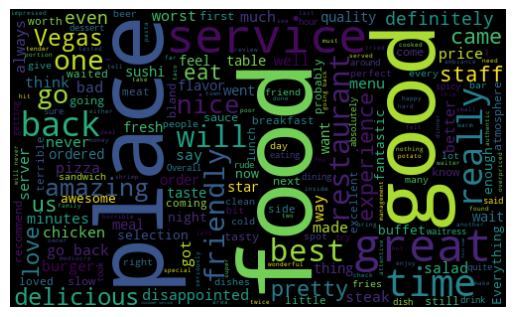

In [22]:
from wordcloud import WordCloud

# Combine all messages into a single string
all_messages = ' '.join(df['Review'])

# Create a WordCloud object with the desired settings
wordCloud = WordCloud(width=500, height=300, random_state=20, max_font_size=100).generate(all_messages)

# Display the WordCloud image
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Visuals Count of Negative and Positive Reviews

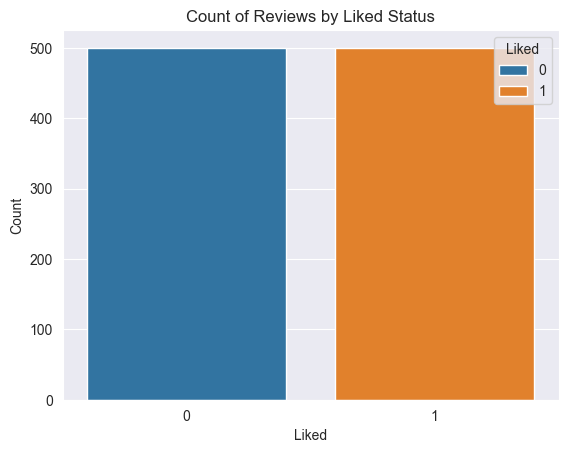

In [23]:
sns.set_style('darkgrid')

# Create a count plot of the "Liked" column
sns.countplot(x='Liked', data=df,hue='Liked')

# Set the title of the plot
plt.title('Count of Reviews by Liked Status')

# Set the label for the x-axis
plt.xlabel('Liked')

# Set the label for the y-axis
plt.ylabel('Count')

# Show the plot
plt.show()

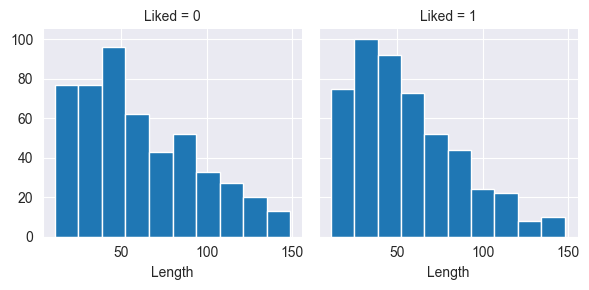

In [24]:
g = sns.FacetGrid(df, col='Liked')

# Use the FacetGrid object to plot a histogram of the 'Length' column for each value of 'Liked'
g.map(plt.hist, 'Length')

### Histogram of Review length based on Liked status

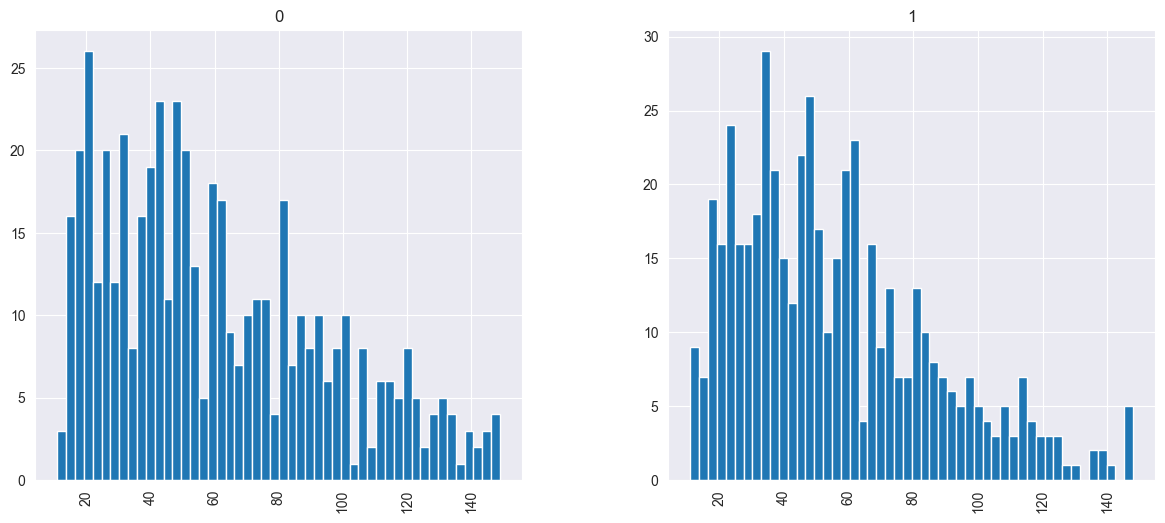

In [25]:
df.hist(column='Length', by='Liked', bins=50,figsize=(14,6));

### Feature extraction of each review

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
cv=CountVectorizer()

### Spliting Dataset into Independent and Target Variables

In [28]:
x=df['Review'].str.lower()
y=df['Liked']

In [29]:
x=cv.fit_transform(x)

### Spliting dataset into Training and Testing Set

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=42)

### Importing Naive Bayes and Support Vector Machines Models

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [33]:
nb = MultinomialNB()
svm= SVC(kernel="linear", C=1.0)

### Training Models

In [34]:
nb.fit(x_train,y_train)

MultinomialNB()

In [35]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

### Testing Models

In [36]:
pred1 = nb.predict(x_test)
pred2 = svm.predict(x_test)

### Evaluating Model based on Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [38]:
print(confusion_matrix(y_test,pred1))

[[130  22]
 [ 34 114]]


In [39]:
print(confusion_matrix(y_test,pred2))

[[121  31]
 [ 36 112]]


### Evaluation Based on Accuracy Score

In [40]:
print(accuracy_score(y_test,pred1))

0.8133333333333334


In [41]:
print(accuracy_score(y_test,pred2))

0.7766666666666666


### Evaluation based on Classification Report

In [42]:
print(f"For Naive Bayes model:\n{classification_report(y_test,pred1)}")

For Naive Bayes model:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       152
           1       0.84      0.77      0.80       148

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300



In [43]:
print(f"For SVM model:\n{classification_report(y_test,pred2)}")

For SVM model:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       152
           1       0.78      0.76      0.77       148

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



## Based on The Evaluation Metrics and Classification Report, We can conclude that Naive Bayes Model Is a better Fit for prediction Than SVM. 

### Function to Build A Word Cloud 

In [44]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=600, background_color="white").generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

### Building A Word Cloud of Words mostly used in Positive Reviews

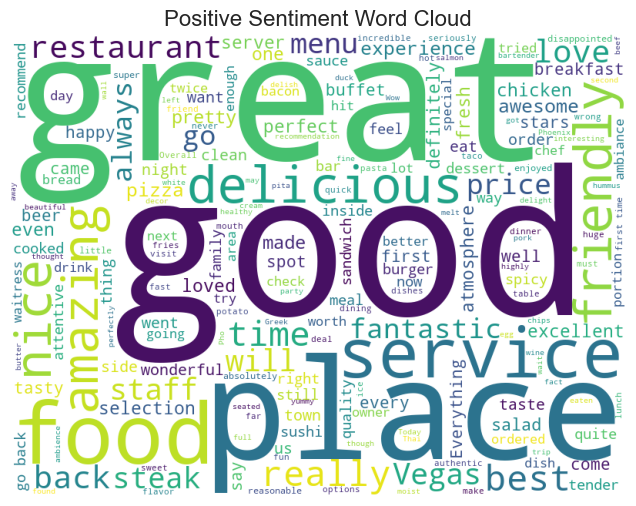

In [45]:
positive_reviews = df[df["Liked"] == 1]["Review"].tolist()
positive_text = " ".join(positive_reviews)
generate_wordcloud(positive_text, "Positive Sentiment Word Cloud")

### Building A Word Cloud of Words mostly used in Negative Reviews

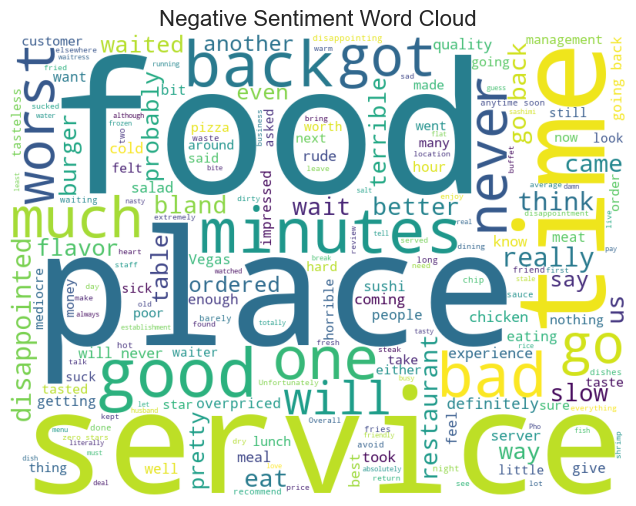

In [46]:
negative_reviews = df[df["Liked"] == 0]["Review"].tolist()
negative_text = " ".join(negative_reviews)
generate_wordcloud(negative_text, "Negative Sentiment Word Cloud")